# 概览(Brief):20241018

In [1]:
repday='20241018'
lastday='20241017'

In [2]:
from rich.console import Console
from rich.table import Table
import pandas as pd

#美观显示DataFrame表格
class DataFramePretty(object):
    def __init__(self, df: pd.DataFrame, min_max_cols=[]) -> None:
        self.data = df
        self.min_max_cols = min_max_cols

    def __set_min_max_style(self, df: pd.DataFrame):
        imax = self.data.idxmax()
        imin = self.data.idxmin()

        max_tmpl = "[b on red3]{}[/b on red3]"
        min_tmpl = "[i on green3]{}[/i on green3]"

        for col in self.min_max_cols:
            col_idx = imax.index.tolist().index(col)
            val = df.iloc[imax[col], col_idx]
            df.iloc[imax[col], col_idx] = max_tmpl.format(val)

            col_idx = imin.index.tolist().index(col)
            val = df.iloc[imin[col], col_idx]
            df.iloc[imin[col], col_idx] = min_tmpl.format(val)

    def show(self):
        table = Table(
            title="DataFrame",
            title_style="i on dark_cyan",
            header_style="bold cyan",
        )

        # self.data是原始数据
        # df 是用来显示的数据
        df = self.data.copy()
        for col in df.columns:
            df[col] = df[col].astype("str")
            table.add_column(col)

        self.__set_min_max_style(df)

        for idx in range(len(df)):
            table.add_row(*df.iloc[idx].tolist())

        console = Console()
        console.print(table)

## 1. 新闻
###  1.1 新浪财经首页截屏
![首页新闻](sina.png)

### 1.2 东方财富国内早盘新闻 

In [3]:
import akshare as ak
from datetime import datetime, time

news_dfgn = ak.stock_info_cjzc_em()
news_dfgn['发布时间']=pd.to_datetime(news_dfgn['发布时间'])
news_dfgn[news_dfgn['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,东方财富财经早餐 10月18日周五,【财经早餐】1、国务院副总理丁薛祥：加力提效实施存量政策和一揽子增量政策。2、今年第二轮存款...,2024-10-18 06:00:29,http://finance.eastmoney.com/a/202410183209429...
1,东方财富财经早餐 10月17日周四,【财经早餐】1、网传拆迁户拿17套房、还有人获千万赔偿款，成都辟谣。2、央行、科技部联合印发...,2024-10-17 06:00:18,http://finance.eastmoney.com/a/202410173208222...


### 1.3 东方财富国际新闻

In [4]:
news_dfgj = ak.stock_info_global_em()
news_dfgj['发布时间']=pd.to_datetime(news_dfgj['发布时间'])
news_dfgj[news_dfgj['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,中债信用增进公司正式启动证券、基金、保险公司互换便利相关工作,【中债信用增进公司正式启动证券、基金、保险公司互换便利相关工作】中国人民银行正式启动证券、基...,2024-10-18 12:22:39,https://finance.eastmoney.com/a/20241018321014...
1,国家统计局：总量的就业形势相对比较稳定,【国家统计局：总量的就业形势相对比较稳定】国家统计局副局长盛来运在国新办新闻发布会上表示，党...,2024-10-18 12:17:30,https://finance.eastmoney.com/a/20241018321014...
2,港股午评：恒生指数涨0.75% 中资券商股大涨,【港股午评：恒生指数涨0.75% 中资券商股大涨】港股午间收盘，恒生指数涨0.75%，恒生科...,2024-10-18 12:08:28,https://finance.eastmoney.com/a/20241018321014...
3,中国汽车技术研究中心龚进峰：智能网联汽车领域多项国家标准将于2024至2026年密集发布,【中国汽车技术研究中心龚进峰：智能网联汽车领域多项国家标准将于2024至2026年密集发布】...,2024-10-18 12:01:46,https://finance.eastmoney.com/a/20241018321014...
4,习近平：推进中国式现代化 科技要打头阵,【习近平：推进中国式现代化 科技要打头阵】17日下午，习近平总书记在安徽合肥滨湖科学城，察看...,2024-10-18 11:54:49,https://finance.eastmoney.com/a/20241018321013...
...,...,...,...,...
195,周五你需要知道的隔夜全球要闻,【周五你需要知道的隔夜全球要闻】1、现货黄金、COMEX黄金期货均突破历史新高。现货黄金上涨...,2024-10-18 06:30:51,https://finance.eastmoney.com/a/20241018320943...
196,丰田汽车和汽车电子配件生产商Denso Corp.将对Rapidus Corp.追加投资,丰田汽车和汽车电子配件生产商Denso Corp.将对Rapidus Corp.追加投资。,2024-10-18 06:27:17,https://finance.eastmoney.com/a/20241018320943...
197,富士软件株式会社创始人表示：我支持由贝恩资本提出的方案,富士软件株式会社创始人表示，我支持由贝恩资本提出的方案。,2024-10-18 06:16:57,https://finance.eastmoney.com/a/20241018320943...
198,巴菲特旗下伯克希尔哈撒韦对美国银行套现3.699亿美元,巴菲特旗下伯克希尔哈撒韦对美国银行套现3.699亿美元。,2024-10-18 06:03:50,https://finance.eastmoney.com/a/20241018320943...


### 1.4 新浪国际财经

In [5]:
news_sinagj = ak.stock_info_global_sina()
news_sinagj['时间']=pd.to_datetime(news_sinagj['时间'])
news_sinagj[news_sinagj['时间']>lastday]

,时间,内容
0,2024-10-18 12:33:57,【2024年陕西数字化典型应用场景发布】近日，陕西省工信厅公布2024年数字化典型应用场景，...
1,2024-10-18 12:33:06,【累计航行1200余小时 海警在北极附近画了一个圈】10月17日，中国海警舰艇编队圆满完成“...
2,2024-10-18 12:31:22,【复旦李志青：人们心中要有ESG，但不能有ESG主义】“2024 ESG全球领导者大会”于1...
3,2024-10-18 12:30:33,【多地加力支持家电以旧换新 消费市场热度升温】 记者从山西省商务厅了解到，自9月14日开展加...
4,2024-10-18 12:30:23,【渤健生物丁伟波：罕见病领域还有很多工作需要做，需要整个生态体系支持】 “2024 ESG全...
5,2024-10-18 12:29:08,【大和：首予极兔速递“跑赢大市”评级 目标价为7港元】大和发表研究报告指，首次覆盖极兔速递，...
6,2024-10-18 12:26:02,【重庆市万州区政协原党组书记、主席蒲承明被开除党籍和公职】据重庆市纪委监委消息：日前，经重庆...
7,2024-10-18 12:22:56,泰国副财长：希望今年经济增长3%，明年超过3%。经济将由刺激措施驱动。计划从今年晚些时候推出...
8,2024-10-18 12:22:10,【桥水创始人对美国权力能否有序过渡及选举结果是否会被两党接受表示担忧】桥水创始人达利欧担心美...
9,2024-10-18 12:20:52,【中债信用增进公司正式启动证券、基金、保险公司互换便利相关工作】10月18日，中国人民银行正...


## 2. 市场趋势
### 2.1 富时50、中证50


### 2.1 港股
恒生指数（HSI）最近30天

In [6]:
stock_hk_daily_hfq_df = ak.stock_hk_daily(symbol="HSI", adjust="")
stock_hk_daily_hfq_df

,date,open,high,low,close,volume
0,2013-08-20,22396.289,22481.740,21907.211,21964.051,6.352194e+10
1,2013-08-21,21964.689,21970.250,21618.600,21817.730,7.237452e+09
2,2013-08-22,21538.189,21944.471,21538.189,21895.400,8.229203e+09
3,2013-08-23,22006.410,22103.900,21769.039,21863.510,7.544465e+09
4,2013-08-26,21943.400,22116.000,21898.150,22005.320,7.672642e+09
...,...,...,...,...,...,...
2742,2024-10-10,21046.000,21622.650,20983.940,21251.980,3.000518e+10
2743,2024-10-14,21228.650,21348.860,20693.750,21092.871,2.496885e+10
2744,2024-10-15,21046.190,21095.010,20154.710,20318.791,2.312060e+10
2745,2024-10-16,20144.750,20548.180,20131.340,20286.850,2.069908e+10


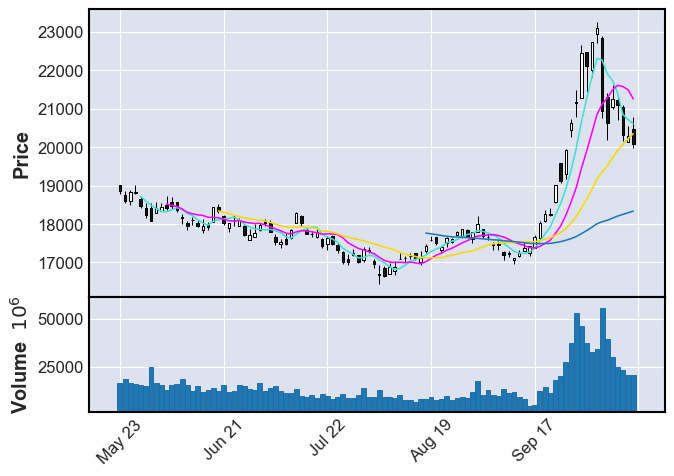

In [7]:
import mplfinance as mpf

# plot the stock DataFrame
# df: the DataFrame
# OCHLDict: {'columnName in Oiginal DF':'standard OCHLV names (initial capital)'}
def plotStock(df,OCHLVDict):
    #column
    gt_ul_index_plot=df.rename(columns=OCHLVDict)
    gt_ul_index_plot['Date']=pd.to_datetime(gt_ul_index_plot['Date'])
    gt_ul_index_plot=gt_ul_index_plot.set_index('Date')
    mpf.plot(gt_ul_index_plot,type='candle',volume=True,mav=(5,10,20,60,120,250))

#plot sina stock chart
def plotSinaStock(df,days):
    OCHLVDict={}
    for key in df.columns.to_list():
        new_key = key[0].upper() + key[1:].lower()
        OCHLVDict[key] = new_key
    plotStock(df.tail(days),OCHLVDict)
    
plotSinaStock(stock_hk_daily_hfq_df,100)

### 2.2 美国道琼斯
近20天走势,昨日大幅上扬。

In [8]:
stock_dji_daily_df = ak.stock_us_daily(symbol=".DJI", adjust="")
stock_dji_daily_df

,date,open,high,low,close,volume
0,2004-01-02,10452.7402,10554.9600,10367.4102,10409.8496,168890000.0
1,2004-01-05,10411.8496,10575.9199,10411.8496,10544.0703,221290000.0
2,2004-01-06,10543.8496,10584.0703,10454.3701,10538.6602,191460000.0
3,2004-01-07,10535.4600,10587.5498,10432.0000,10529.0303,225490000.0
4,2004-01-08,10530.0703,10651.9902,10480.5898,10592.4404,237770000.0
...,...,...,...,...,...,...
5231,2024-10-11,42507.5312,42899.7500,42507.5312,42863.8594,265334505.0
5232,2024-10-14,42800.8906,43139.0000,42707.1406,43065.2188,240056108.0
5233,2024-10-15,43240.1719,43277.7812,42703.1719,42740.4219,360882409.0
5234,2024-10-16,42706.4883,43100.8398,42692.3711,43077.6992,297512296.0


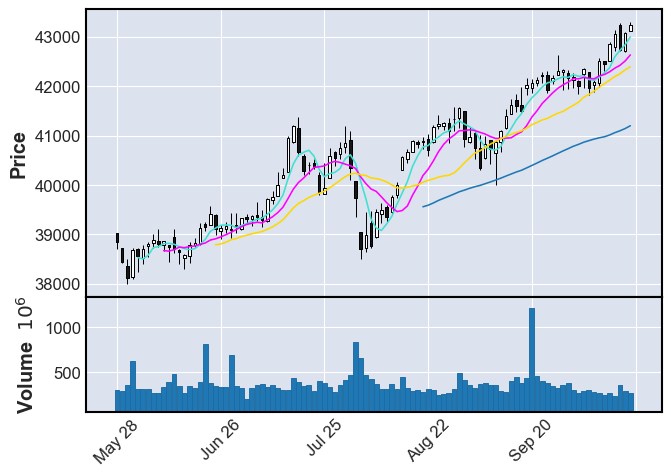

In [9]:
plotSinaStock(stock_dji_daily_df,100)

### 2.3 美国纳斯达克
近20天走势，昨日大幅上扬

In [10]:
stock_nasdaq_daily_df = ak.stock_us_daily(symbol=".IXIC", adjust="")
stock_nasdaq_daily_df

,date,open,high,low,close,volume
0,2004-01-02,2011.0800,2022.3700,1999.7700,2006.6801,1.666780e+09
1,2004-01-05,2020.7800,2047.3600,2020.7800,2047.3600,2.362910e+09
2,2004-01-06,2044.5500,2061.5400,2039.6300,2057.3701,2.273220e+09
3,2004-01-07,2056.7500,2078.0901,2047.0200,2077.6799,2.294280e+09
4,2004-01-08,2089.6001,2100.2500,2078.0500,2100.2500,2.683950e+09
...,...,...,...,...,...,...
5229,2024-10-11,18217.7344,18375.5352,18208.4414,18342.9375,4.528156e+09
5230,2024-10-14,18426.6582,18547.9160,18423.5996,18502.6855,4.351716e+09
5231,2024-10-15,18515.9727,18564.2461,18252.5215,18315.5859,5.319045e+09
5232,2024-10-16,18333.2930,18383.1074,18214.9551,18367.0781,4.704345e+09


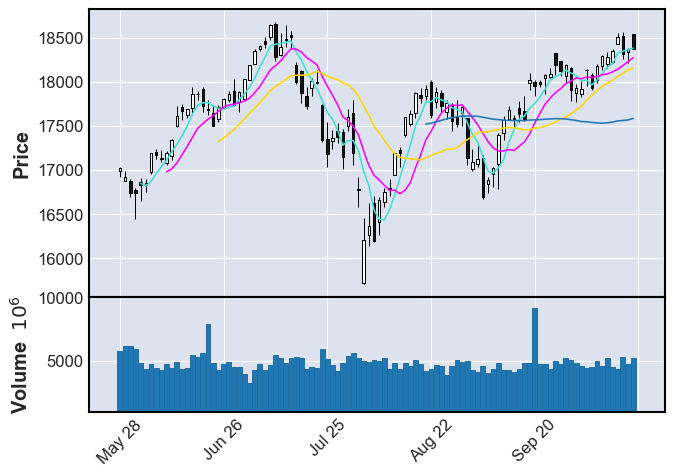

In [11]:
plotSinaStock(stock_nasdaq_daily_df,100)

## 3. 板块热点
### 2.1 昨日热点10大板块
昨天涨停股票分布的板块

In [12]:
def limitupList(date):
    collist=['所属行业','代码','名称','涨跌幅','首次封板时间','最后封板时间','炸板次数','涨停统计','连板数']
    stock_zt_pool_em_df = ak.stock_zt_pool_em(date)
    last_hs_10=stock_zt_pool_em_df[collist]
    return last_hs_10
last_hs_10=limitupList(lastday)
last_hs_10

,所属行业,代码,名称,涨跌幅,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数
0,工程建设,002628,成都路桥,10.119048,092500,092500,0,4/4,4
1,有色金属,300489,光智科技,19.989841,092500,092500,0,4/4,4
2,工程建设,600939,重庆建工,9.970675,092500,092500,0,4/4,4
3,计算机设,000066,中国长城,10.000000,092500,092500,0,1/1,1
4,互联网服,002766,索菱股份,10.040161,092500,092500,0,1/1,1
5,工程咨询,300826,测绘股份,20.027342,092500,092500,0,1/1,1
6,半导体,301297,富乐德,19.980789,092500,092500,0,1/1,1
7,装修建材,603268,松发股份,10.034843,092500,092500,0,1/1,1
8,房地产开,600622,光大嘉宝,9.887006,092501,143207,4,11/8,5
9,装修装饰,603038,华立股份,10.000000,092502,092502,0,5/5,5


热点追踪：涨停行业汇总明细

In [13]:
grouped_df=last_hs_10.groupby('所属行业',observed=False).size().reset_index(name='计数')
grouped_df['占比']=grouped_df['计数']/grouped_df['计数'].sum()

sort_df=grouped_df.sort_values(by='计数', ascending=False)
sort_df

,所属行业,计数,占比
29,软件开发,6,0.101695
1,互联网服,4,0.067797
10,工程建设,3,0.050847
35,铁路公路,3,0.050847
20,电子元件,3,0.050847
17,消费电子,3,0.050847
14,有色金属,2,0.033898
13,文化传媒,2,0.033898
0,专用设备,2,0.033898
7,塑料制品,2,0.033898


In [14]:
top_10 = sort_df.head(10)
total_cumulative = top_10['占比'].sum()
judge='集中' if total_cumulative>0.6 else '不集中'
print(f'前10板块涨幅靠前累计占比：{total_cumulative}, 热点{judge}。')

前10板块涨幅靠前累计占比：0.5084745762711864, 热点不集中。


### 2.2 今日热点

国泰君安板块热点（10:05)
上涨涨板块很少。  
![今日涨幅国泰君安APP](gtja.png)

#### 2.2.1 集合竞价概念板块排名

In [15]:
import os

#记录排名
# basename: 板块类型（概念板块、行业板块）
# start_time, end_time: 排名时间段
# sector: 板块名称
def recordRank(basename,start_time,end_time):
    now = datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'{basename}{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        if basename=='conceptRank':
            rank=ak.stock_board_concept_name_em()
        elif basename=='industryRank':
            rank=ak.stock_board_industry_name_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('非指定时间段，没有数据源.')
            rank=pd.DataFrame()
    if not rank.empty:
        mvtotal=rank['总市值'].sum()
        rank['市值比']=rank['总市值']/mvtotal
        rank['上涨家数%']=rank['上涨家数']/(rank['上涨家数']+rank['下跌家数'])
        columns=['排名','板块名称','板块代码','涨跌幅','市值比','换手率','上涨家数%','领涨股票','领涨股票-涨跌幅']
        rank=rank[columns]
    return rank

#排名靠前的板块的股票明细排名
# sectorRankDf: 板块排名DataFrame(recordRank生成)
# sectorNum,stockNum: 返回板块数、股票数
def top5sectorStocks(basename,start_time,end_time,sectorRankDf,sectorNum=5,stockNum=5):
    top5={}
    now = datetime.now()
    tStr = start_time.strftime("%Y%m%d%H%M")
    if sectorRankDf.empty:
        print('非指定时间段，没有数据源。')
    else:
        print('排名前5领涨板块成分股列表。')
        for sym in sectorRankDf['板块名称'].to_list()[:5]:
            csvfile=f'{basename}_{sym}{tStr}.txt'
            if now.time() < end_time and now.time() >= start_time:
                if basename=='conceptRank':
                    top5[sym]=ak.stock_board_concept_cons_em(sym)
                else:
                    top5[sym]=ak.stock_board_industry_cons_em(sym)
                top5[sym].to_csv(csvfile)
            else:
                if os.path.exists(csvfile):
                    top5[sym]=pd.read_csv(csvfile)
                else:
                    print('No record stored and not available from source.')
                    top5[sym]=pd.DataFrame()

            if not top5[sym].empty:
                atotal=top5[sym]['成交额'].sum()
                top5[sym]['成交额比']=top5[sym]['成交额']/atotal
                columns=['代码','名称','涨跌幅','成交额','换手率','市盈率-动态','市净率']
                top5[sym]=top5[sym][columns][:stockNum]
                print(f'板块：{sym}:\n{top5[sym]}\n\n')
    return top5   

In [16]:
#当天集合竞价阶段概念板块排名
basename='conceptRank'
start_time = time(9, 15)
end_time = time(9, 31)
rank0=recordRank(basename,start_time,end_time)
rank0.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,昨日连板_含一字,BK1051,4.06,0.000118,1.81,0.739130,川润股份,10.06
1,2,昨日涨停_含一字,BK1050,3.63,0.000332,1.52,0.716667,川润股份,10.06
2,3,昨日涨停,BK0815,3.31,0.000281,1.44,0.673077,川润股份,10.06
3,4,昨日连板,BK0816,2.97,0.000094,1.63,0.666667,川润股份,10.06
4,5,高带宽内存,BK1152,2.18,0.000079,0.19,0.750000,天马新材,22.47
5,6,液冷概念,BK1138,1.80,0.000534,0.19,0.690909,川润股份,10.06
6,7,铜缆高速连接,BK1168,1.40,0.000349,0.18,0.814815,凯旺科技,19.99
7,8,玻璃基板,BK1175,1.39,0.000298,0.05,0.656250,麦格米特,10.01
8,9,屏下摄像,BK0947,1.27,0.000311,0.14,0.875000,欧菲光,6.84
9,10,Chiplet概念,BK1101,1.25,0.000317,0.06,1.000000,文一科技,10.00


In [17]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank0)

排名前5领涨板块成分股列表。
板块：昨日连板_含一字:
       代码    名称    涨跌幅           成交额   换手率  市盈率-动态    市净率
0  300489  光智科技  20.00  5.508805e+07  0.71 -110.20  13.65
1    2272  川润股份  10.06  8.386032e+07  2.80  -33.75   2.39
2    2693  双成药业  10.01  4.265558e+08  4.08 -315.92  23.54
3  600520  文一科技  10.00  4.211074e+07  0.83  314.44  13.88
4    2628  成都路桥  10.00  2.433979e+08  7.92  -55.26   1.04


板块：昨日涨停_含一字:
       代码    名称    涨跌幅           成交额   换手率  市盈率-动态    市净率
0  301297   富乐德  20.02  8.833037e+06  0.21  101.43   6.98
1  300489  光智科技  20.00  5.527513e+07  0.71 -110.20  13.65
2  301182  凯旺科技  19.99  1.275813e+08  8.94  -88.89   4.38
3    2272  川润股份  10.06  8.386032e+07  2.80  -33.75   2.39
4    2693  双成药业  10.01  4.265558e+08  4.08 -315.92  23.54


板块：昨日涨停:
       代码    名称    涨跌幅           成交额   换手率  市盈率-动态   市净率
0  838971  天马新材  22.47  8.774519e+07  2.89  126.88  9.04
1  301182  凯旺科技  19.99  1.275813e+08  8.94  -88.89  4.38
2  835207  众诚科技  17.93  5.406612e+07  5.76  -38.93  5.09
3  837092  汉鑫科技  12.67

#### 2.2.3 开盘后15分钟概念板块排名

In [18]:
start_time = time(9, 31)
end_time = time(9, 46)
rank1=recordRank(basename,start_time,end_time)
rank1.head(20)

非指定时间段，没有数据源.


""


排名前5概念板块领涨成分股

In [19]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank1)

非指定时间段，没有数据源。


#### 2.2.3 集合竞价行业板块涨跌幅

In [20]:
#当天集合竞价到开盘后30分钟涨跌幅排名
basename='industryRank'
start_time = time(9, 15)
end_time = time(9, 31)
rank3=recordRank(basename,start_time,end_time)
rank3.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,贵金属,BK0732,1.76,0.008870,0.06,0.923077,玉龙股份,2.55
1,2,非金属材料,BK1020,1.06,0.003442,0.14,0.580645,天马新材,22.47
2,3,电源设备,BK1034,0.78,0.002883,0.16,0.520000,麦格米特,10.01
3,4,半导体,BK1036,0.62,0.040244,0.07,0.756579,富乐德,20.02
4,5,银行,BK0475,0.47,0.138332,0.00,0.950000,张家港行,1.40
5,6,证券,BK0473,0.45,0.035105,0.06,0.914894,XD海通证,2.63
6,7,有色金属,BK0478,0.45,0.011481,0.04,0.632353,光智科技,20.00
7,8,电子元件,BK0459,0.35,0.018163,0.11,0.625000,东晶电子,7.50
8,9,消费电子,BK1037,0.35,0.020276,0.11,0.618557,凯旺科技,19.99
9,10,珠宝首饰,BK0734,0.26,0.001473,0.04,0.733333,莱绅通灵,1.31


行业板块中成分股

In [21]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank3)

排名前5领涨板块成分股列表。
板块：贵金属:
       代码     名称   涨跌幅          成交额   换手率  市盈率-动态   市净率
0     506  *ST中润  4.76   1998149.12  0.12  -14.88  2.57
1  601028   玉龙股份  2.48  35728199.00  0.33   23.06  3.22
2  600489   中金黄金  2.33  50956380.00  0.07   20.14  2.74
3     975   山金国际  2.03  46320169.00  0.10   24.05  4.36
4  600547   山东黄金  1.77  37903688.00  0.04   45.59  5.37


板块：非金属材料:
       代码    名称    涨跌幅           成交额   换手率  市盈率-动态   市净率
0  838971  天马新材  23.88  8.936647e+07  2.94  128.35  9.14
1  839792  东和新材  11.92  1.222166e+07  2.53   21.63  1.42
2    2130  沃尔核材   4.20  2.932536e+08  1.31   27.19  4.48
3  300743  天地数码   1.89  8.938528e+06  0.46   24.52  3.98
4    1296  长江材料   0.82  1.822004e+06  0.22   17.05  1.39


板块：电源设备:
       代码    名称    涨跌幅          成交额   换手率   市盈率-动态   市净率
0    2851  麦格米特  10.01  66230904.92  0.47    27.13  3.82
1  300870   欧陆通   8.68  36505393.00  0.65    32.64  3.01
2    2366  融发核电   2.71  94535025.95  1.77  2400.39  1.87
3  301516   中远通   1.37   6345979.00  0.53  -140.

#### 2.2.4 开盘15分钟行业板块涨跌幅

In [22]:
basename='industryRank'
start_time = time(9, 31)
end_time = time(9, 46)
rank4=recordRank(basename,start_time,end_time)
rank4.head(20)

非指定时间段，没有数据源.


""


行业板块中成分股

In [23]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank4)

非指定时间段，没有数据源。


### 2.2.5 集合竞价阶段涨停个股热点明细

In [24]:
def stockLimitUp(start_time,end_time):
    now = datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'limitUp{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        rank=ak.stock_zh_a_spot_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('No record stored and not available from source.')
            rank=pd.DataFrame()
    if not rank.empty:
        columns=['代码','名称','涨跌幅','量比','换手率','市盈率-动态','市净率','流通市值','涨速','5分钟涨跌','60日涨跌幅','年初至今涨跌幅']
        rank=rank[columns].sort_values(by='涨跌幅', ascending=False)
    return rank

In [25]:
start_time = time(9, 15)
end_time = time(9, 31)
openA = stockLimitUp(start_time,end_time)
openA.tail(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
2886,667,ST美置,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2887,666,经纬纺机,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2888,662,天夏退,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2889,660,*ST南华,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2891,658,ST海洋,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2892,653,ST九州,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2896,621,*ST比特,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2897,618,吉林化工,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2898,616,*ST海投,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2899,613,东海A退,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00,0.00


### 2.2.6 开盘15分钟涨停个股热点明细


In [26]:
start_time = time(9, 31)
end_time = time(9, 46)
open15 = stockLimitUp(start_time,end_time)
open15.head(50)

No record stored and not available from source.


""


## 4.个股市场


### 4.1 跟进股票列表
#### 4.1.1 历史K线

In [27]:
def plotDcStockSingle(df,days):
    OCHLVDict={'日期':'Date','开盘':'Open','收盘':'Close','最高':'High','最低':'Low','成交量':'Volume'}
    print(f'{days}K线图')
    plotStock(df.tail(days),OCHLVDict)

In [28]:
def plotDcStocks(stocksymb,periods):
    stockDict={}
    for p in periods:
        stockdf = ak.stock_zh_a_hist(symbol=stocksymb,period=p)
        stocknamedf=ak.stock_individual_info_em(symbol=stocksymb)
        stockname=stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1]
        stockDict[p]=stockdf
        print(f'{stockname}-周期：{p}\n{stockdf}')
        plotDcStockSingle(stockdf,100)
    stockDict['name']=stocksymb
    return stockDict

润和软件-周期：daily
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     2012-07-18  300339  28.00  23.90  28.00  23.21   150973  3.772116e+08   
1     2012-07-19  300339  24.40  24.07  25.30  23.71    93127  2.276391e+08   
2     2012-07-20  300339  24.00  24.19  24.78  23.92    61087  1.484579e+08   
3     2012-07-23  300339  23.51  23.20  23.59  21.78    60498  1.371628e+08   
4     2012-07-24  300339  23.60  25.52  25.52  23.50    81850  2.034769e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
2820  2024-10-14  300339  51.30  60.46  60.46  44.00  2453708  1.302834e+10   
2821  2024-10-15  300339  62.06  60.02  71.80  57.01  3878631  2.538808e+10   
2822  2024-10-16  300339  57.24  60.78  63.50  54.77  2669250  1.597357e+10   
2823  2024-10-17  300339  63.00  62.37  69.45  59.19  3066714  1.987702e+10   
2824  2024-10-18  300339  60.20  58.43  62.20  57.01  1347471  8.000286e+09   

         振幅    涨跌幅    涨跌额    换手率  
0 

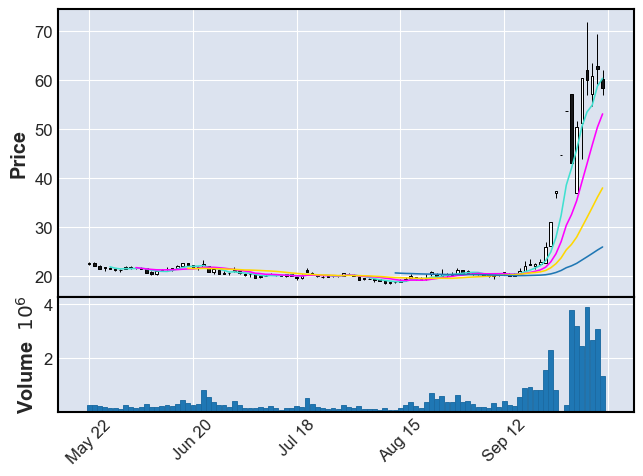

润和软件-周期：weekly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2012-07-20  300339  28.00  24.19  28.00  23.21    305187  7.533086e+08   
1    2012-07-27  300339  23.51  24.80  27.00  21.78    379070  9.502016e+08   
2    2012-08-03  300339  24.30  23.72  25.17  22.02    178747  4.147968e+08   
3    2012-08-10  300339  23.41  24.92  25.57  23.20    155756  3.791379e+08   
4    2012-08-17  300339  24.80  24.76  25.90  24.06     87260  2.188727e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
595  2024-09-20  300339  20.07  22.19  23.08  20.05   1706501  3.678101e+09   
596  2024-09-27  300339  22.50  31.14  31.14  21.52   6452017  1.662670e+10   
597  2024-09-30  300339  37.00  37.37  37.37  35.99    832555  3.087031e+09   
598  2024-10-11  300339  44.84  50.38  57.13  36.99   7308374  3.496253e+10   
599  2024-10-18  300339  51.30  58.43  71.80  44.00  13415773  8.226730e+10   

        振幅    涨跌幅    涨跌额     换手率  
0

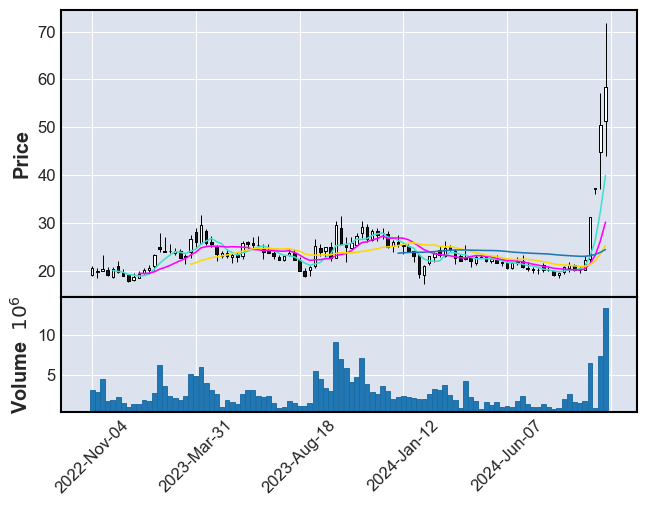

润和软件-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2012-07-31  300339  28.00  22.20  28.00  21.78    769468  1.904240e+09   
1    2012-08-31  300339  22.05  26.35  27.88  22.02    518439  1.285591e+09   
2    2012-09-28  300339  26.25  24.40  29.16  23.64    259629  6.996420e+08   
3    2012-10-31  300339  24.40  25.38  26.60  23.70     99730  2.513733e+08   
4    2012-11-30  300339  25.38  20.70  26.10  20.10     73468  1.762272e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
139  2024-06-28  300339  21.68  20.67  23.34  20.26   6027210  1.307903e+10   
140  2024-07-31  300339  20.60  20.66  21.89  19.24   4915497  1.005085e+10   
141  2024-08-30  300339  20.51  21.24  21.76  18.47   6279256  1.266894e+10   
142  2024-09-30  300339  21.20  37.37  37.37  19.48  11942154  2.945327e+10   
143  2024-10-18  300339  44.84  58.43  71.80  36.99  20724148  1.172298e+11   

        振幅    涨跌幅    涨跌额     换手率  


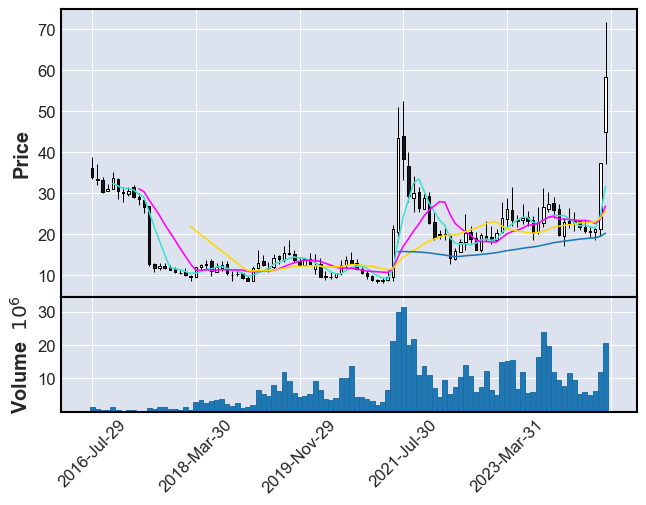

In [29]:
stocksymb='300339'
periods=['daily','weekly','monthly']
stockDict=plotDcStocks(stocksymb,periods)

### 4.1.2 集合竞价阶段盘口信息汇总
股价的订单簿分析

成交在“买一”价，最新成交价: 58.43
   price   volume
0  58.52   2200.0
1  58.51    700.0
2  58.50   2900.0
3  58.49   1000.0
4  58.45   1800.0
5  58.43   4000.0
6  58.42    100.0
7  58.41    700.0
8  58.40  12000.0
9  58.39   6700.0


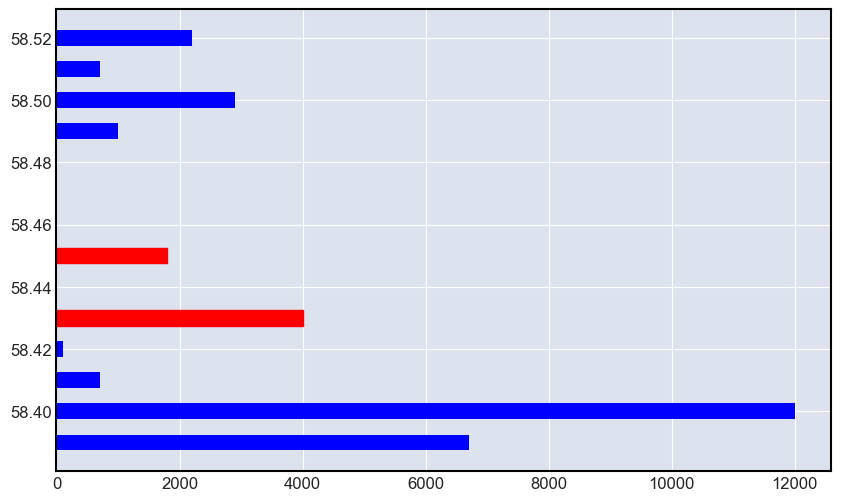

In [38]:
import numpy as np
import matplotlib.pyplot as plt

#订单簿分析
def orderBook(stocksymb,start_time,end_time):
    
    openAuctionDf= ak.stock_bid_ask_em(symbol=stocksymb)
    df1_subset = openAuctionDf.head(20)

    # 处理奇数行的 value 列，保留小数点后二位，并以 .2f 形式显示
    prices = df1_subset.iloc[::2]['value'].apply(lambda x: f'{x:.2f}').tolist()

    # 处理偶数行的 value 列，取平均值的科学计数法的 10 的 x 次方
    volumes = df1_subset.iloc[1::2]['value'].apply(lambda x: f'{x:.1e}').tolist()

    # 创建新的 df2
    df2 = pd.DataFrame({'price': prices, 'volume': volumes})
    
    # 将 volume 列转换为浮点型以便计算和绘图
    df2['volume'] = df2['volume'].astype(float)
    df2['price'] = df2['price'].astype(float)

    # 获取 df1 第 21 行的 value 列值
    latest_price = openAuctionDf.loc[20, 'value']
    sell1price=df2.loc[4,'price']
    selllag=sell1price-latest_price
    buy1price=df2.loc[5,'price']
    buylag=latest_price-buy1price
    if selllag==0:
        msg='成交在“卖一”价，'
    elif buylag==0:
        msg='成交在“买一”价，'
    elif selllag>buylag:
        msg='成交接近“买一”价，'
    elif buylag>selllag:
        msg='成交接近“卖一”价，'
    else:
        msg='成交在“买一”、“卖一”的中间价，'
    print(f"{msg}最新成交价: {latest_price}")
    #???df2.to_csv(f'{}')
    print(df2)

    # 绘制水平条形图
    fig, ax = plt.subplots(figsize=(10, 6))

    # 生成条形图
    bars = ax.barh(y=df2['price'],width=df2['volume'],height=0.005, color='blue', align='center')
    bars[4].set_color('red')  # 第 5 行标注为红色
    bars[5].set_color('red')  # 第 6 行标注为红色
    
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1e}', va='center', ha='left', fontsize=10, color='black')

    # 添加标签
    ax.set_xlabel('Volume')
    ax.set_ylabel('Price')
    ax.set_title('Order Book')
    
    # 显示图表
    plt.show()

orderBook(stocksymb)

#### 4.1.2.1 集合竞价阶段订单簿分析
##### 

#### 4.1.2.2 成交和挂单明细
获取腾讯当日历史分笔数据

In [ ]:
# 根据code代码返回“交易所+代码” 信息，或者反过来
def transferExSym(code):
    if len(code)>6:
        rescode=code[-6:]
    else:
        source={}
        source['sh']=ak.stock_sh_a_spot_em()['代码'].to_list()
        source['sz']=ak.stock_sz_a_spot_em()['代码'].to_list()
        source['bj']=ak.stock_bj_a_spot_em()['代码'].to_list()
        for k in source.keys():
            if code in source[k]:
                rescode=k+code
                break
    return rescode

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#区分北交所和沪深股市，刻画市场深度。按照涨跌停板，作为极值，按照价格涨幅的measure度量区间
def priceMarketDepth(df,measure=0.01):

    open_price = df.loc[df['成交时间'] == '09:30:00', '成交价格'].iloc[0]

    # 设置涨跌停板系数
    if stocksymb == 'bj':
        limit_factor = 0.2
    else:
        limit_factor = 0.1

    # 计算最高价和最低价
    high_price = open_price * (1 + limit_factor)
    low_price = open_price * (1 - limit_factor)

    # 定义价格区间，每1%一档
    price_bins = np.round(np.arange(low_price, high_price, (high_price - low_price) * measure),2)

    # 将价格按照区间划分
    df['价格区间'] = pd.cut(df['成交价格'], bins=price_bins, right=False)

    # 按照价格区间汇总成交量
    volume_summary = df.groupby('价格区间',observed=False)['成交量'].sum().reset_index()

    # 新建 df['prop'] 列
    df['prop'] = df['性质'].apply(lambda x: -1 if x == '卖盘' else (1 if x == '买盘' else 0))
    
    # 按照价格区间汇总成交量和 prop 之和
    summary = df.groupby('价格区间',observed=False).agg({
        '成交量': 'sum',
        'prop': 'sum'
    }).reset_index()
    
    # 提取价格区间的中点和边界
    summary['价格'] = summary['价格区间'].apply(lambda x: round(x.mid,2))
    summary['起始价格'] = summary['价格区间'].apply(lambda x: round(x.left,2))
    summary['终止价格'] = summary['价格区间'].apply(lambda x: round(x.right,2))

    # 分离买盘和卖盘数据
    summary['买盘深度'] = summary['prop'].apply(lambda x: x if x > 0 else 0)
    summary['卖盘深度'] = -summary['prop'].apply(lambda x: -x if x < 0 else 0)

    # 绘制市场深度水平条形图
    fig, ax = plt.subplots(figsize=(14, 21))

    # 绘制买卖盘深度图
    ax.barh(summary['价格'], summary['买盘深度'], color='green', label='buy')
    ax.barh(summary['价格'], summary['卖盘深度'], color='red', label='sell')
    
    # 在图上标注区间价格的起始和终止价格
    for index, row in summary.iterrows():
        ax.text(row['买盘深度'] + max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["起始价格"]:.2f}', va='center', ha='left', fontsize=8, color='black')
        ax.text(-row['卖盘深度'] - max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["终止价格"]:.2f}', va='center', ha='right', fontsize=8, color='black')

    # 设置图表标题和标签
    ax.set_title('Market Depth')
    ax.set_xlabel('Depth(Amount)')
    ax.set_ylabel('Price')
    ax.legend()

    
    # 显示图表
    plt.show()
    
    return summary

In [ ]:
#剔除中性单以后，列出活跃买卖市场深度
def plotActiveMarketDepth(stocksymbol):
    
    #一次性获得历史分笔数据（当天即当天之前的交易时间；隔天即昨天）
    yesterdayTicks=ak.stock_zh_a_tick_tx_js(symbol=transferExSym(stocksymb))
    
    md=priceMarketDepth(yesterdayTicks)
    md = md[(md['买盘深度'] != 0) | (md['卖盘深度'] != 0)]
    mdp=DataFramePretty(md)
    mdp.show()

剔除中性盘以后，主动买卖盘的市场深度

In [ ]:
plotActiveMarketDepth(stocksymb)